# Project Overview

In this project, we will use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.

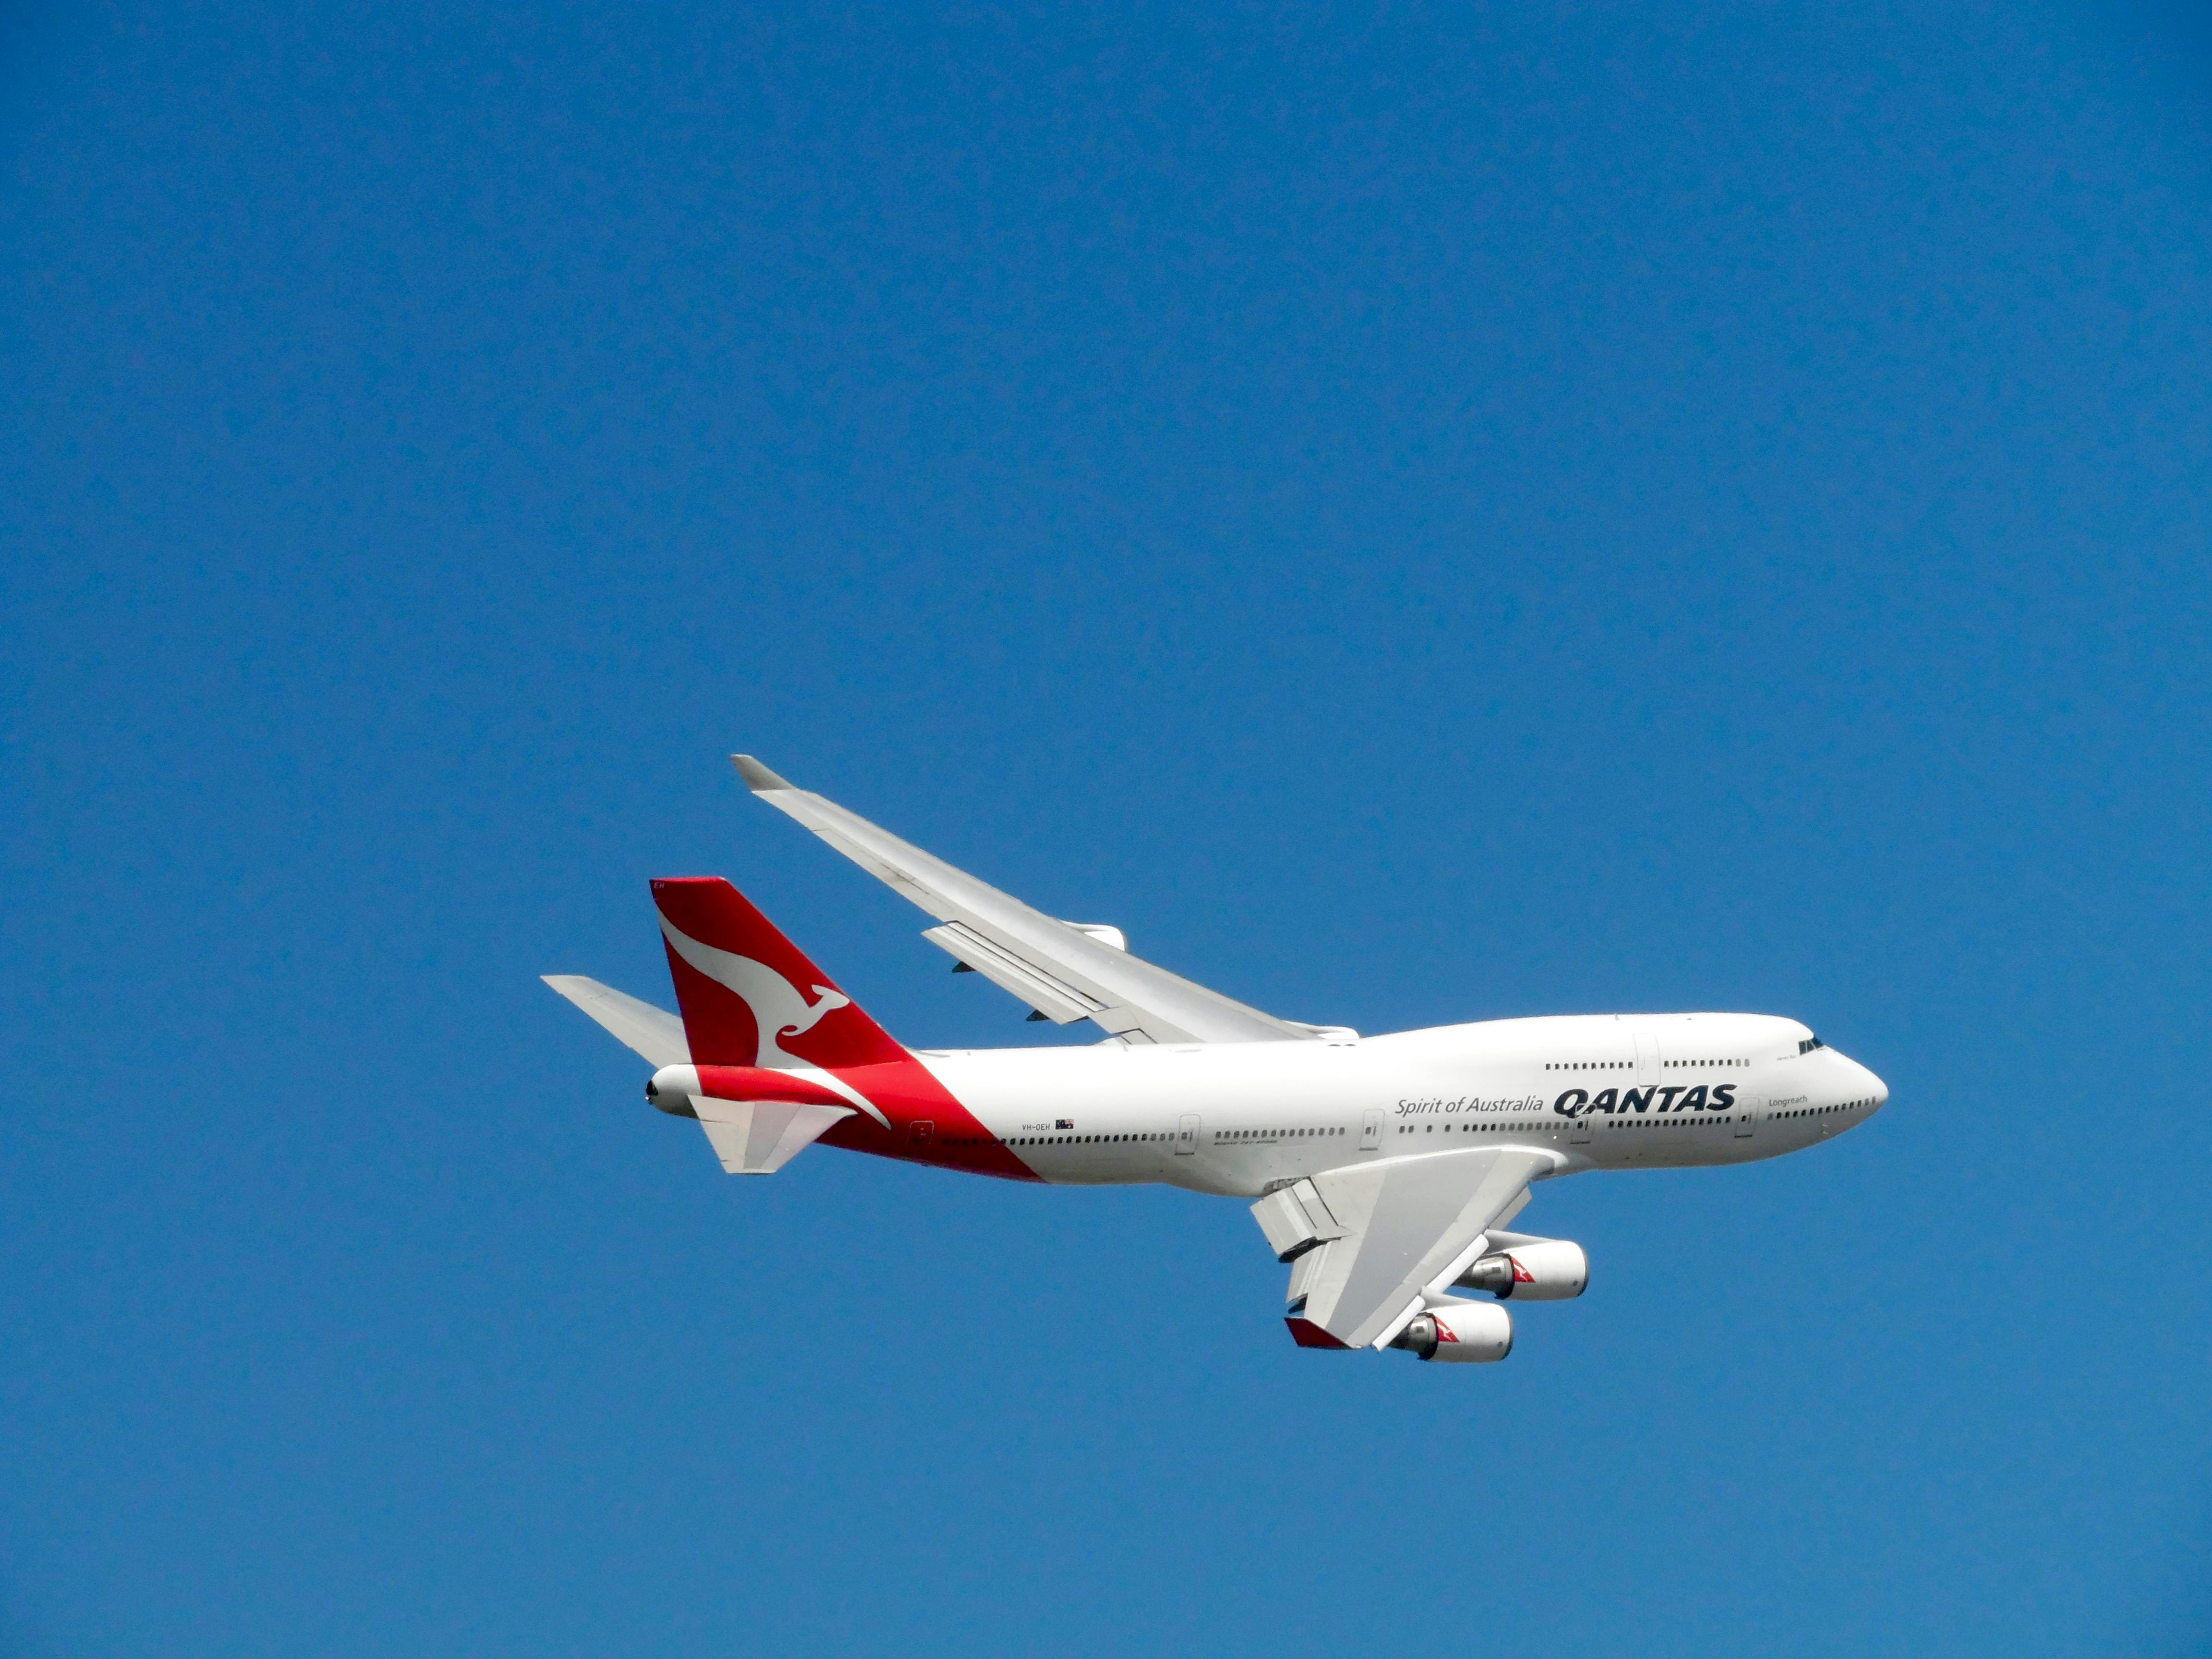

In [98]:
from IPython.display import Image, display

# Specify the filename (if the image is in the same directory as the notebook)
image_path = 'Aircraft.jpg'  # Replace with your actual image filename

# Display the image
display(Image(filename=image_path))


# Business understanding

Overview Goal: The goal of this project is to analyze aviation accident data to identify the lowest-risk aircraft for your company to purchase. The company is expanding into the aviation industry and needs data-driven insights to make informed decisions about which aircraft models to acquire.

In [99]:
#importing pandas and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [100]:
#reading the csv file using pandas
df = pd.read_csv('AviationData.csv', encoding='iso-8859-1')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [101]:
# checking the shape of the Dataframe
df.shape

(88889, 31)

The Dataframe has 88889 rows and 31 columns

In [102]:
#checking information about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [103]:
#statistical description of the Dataframe
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [104]:
# checking the column names found in the Dataframe
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# Data preparation and cleaning

In [105]:
#standardizing the column names
df.columns = df.columns.str.replace('.', ' ', regex=False).str.strip().str.title()
df.columns

Index(['Event Id', 'Investigation Type', 'Accident Number', 'Event Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code',
       'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type', 'Far Description',
       'Schedule', 'Purpose Of Flight', 'Air Carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad Phase Of Flight', 'Report Status',
       'Publication Date'],
      dtype='object')

## Dealing with missing values

In [106]:
#checking the sum of missing values in each column
df.isna().sum()

Event Id                      0
Investigation Type            0
Accident Number               0
Event Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport Code              38757
Airport Name              36185
Injury Severity            1000
Aircraft Damage            3194
Aircraft Category         56602
Registration Number        1382
Make                         63
Model                        92
Amateur Built               102
Number Of Engines          6084
Engine Type                7096
Far Description           56866
Schedule                  76307
Purpose Of Flight          6192
Air Carrier               72241
Total Fatal Injuries      11401
Total Serious Injuries    12510
Total Minor Injuries      11933
Total Uninjured            5912
Weather Condition          4492
Broad Phase Of Flight     27165
Report Status              6384
Publication Date          13771
dtype: i

In [107]:
#Identifying the relevant columns for analysis
relevant_columns = ['Event Id', 'Event Date',
       'Location', 'Country',
       'Injury Severity', 'Aircraft Damage',
       'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type',
       'Purpose Of Flight', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition']
df_relevant= df[relevant_columns]
df_relevant.head()

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC


In [108]:
df_relevant.shape

(88889, 17)

In [109]:
df_relevant.isna().sum()

Event Id                      0
Event Date                    0
Location                     52
Country                     226
Injury Severity            1000
Aircraft Damage            3194
Make                         63
Model                        92
Amateur Built               102
Number Of Engines          6084
Engine Type                7096
Purpose Of Flight          6192
Total Fatal Injuries      11401
Total Serious Injuries    12510
Total Minor Injuries      11933
Total Uninjured            5912
Weather Condition          4492
dtype: int64

In [110]:
#Dropping columns with missing values
drop_columns = ['Location', 'Country',
       'Injury Severity', 'Aircraft Damage',
       'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type',
       'Purpose Of Flight',
       'Weather Condition']
df_relevant = df_relevant.dropna(subset = drop_columns)
df_relevant.isnull().sum()

Event Id                      0
Event Date                    0
Location                      0
Country                       0
Injury Severity               0
Aircraft Damage               0
Make                          0
Model                         0
Amateur Built                 0
Number Of Engines             0
Engine Type                   0
Purpose Of Flight             0
Total Fatal Injuries       9386
Total Serious Injuries    10248
Total Minor Injuries       9525
Total Uninjured            4692
Weather Condition             0
dtype: int64

In [111]:
#Replacing null values in remaining columns
replace_columns = ['Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']

df_relevant = df_relevant.fillna(0)
df_relevant.isnull().sum()

Event Id                  0
Event Date                0
Location                  0
Country                   0
Injury Severity           0
Aircraft Damage           0
Make                      0
Model                     0
Amateur Built             0
Number Of Engines         0
Engine Type               0
Purpose Of Flight         0
Total Fatal Injuries      0
Total Serious Injuries    0
Total Minor Injuries      0
Total Uninjured           0
Weather Condition         0
dtype: int64

In [112]:
df_relevant.head(2)

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK


In [113]:
#updating the location column
df_relevant['Location'] = df_relevant['Location'].str.title().str.replace(r',\s*(\w{2})$', lambda x: x.group(0).upper(), regex=True)
df_relevant.head()

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition
0,20001218X45444,1948-10-24,"Moose Creek, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,"Bridgeport, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC
3,20001218X45448,1977-06-19,"Eureka, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
6,20001218X45446,1981-08-01,"Cotton, MN",United States,Fatal(4),Destroyed,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC


## Converting 'Event Date' to Datetime Format

In this section, we will convert the 'Event Date' column to a datetime format. This will allow us to perform time series analyses and extract specific date components easily.

In [114]:
# Convert the 'Event Date' column to datetime format
# We use pd.to_datetime() to ensure the column is in the correct format for date operations.
df_relevant['Event Date'] = pd.to_datetime(df_relevant['Event Date'], errors='coerce')

# Display the updated DataFrame to verify the conversion
df_relevant

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition
0,20001218X45444,1948-10-24,"Moose Creek, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,"Bridgeport, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC
3,20001218X45448,1977-06-19,"Eureka, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
6,20001218X45446,1981-08-01,"Cotton, MN",United States,Fatal(4),Destroyed,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,CESSNA,150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC
88647,20221011106098,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,CESSNA,177RG,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC
88661,20221018106153,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,BEECH,B-60,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC
88735,20221031106231,2022-10-29,"Houston, TX",United States,Minor,Substantial,STEPHEN J HOFFMAN,MS-500,Yes,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC


In [115]:
# Extract the year from the 'Event Date' column
# We use string slicing to get the first four characters representing the year.
df_relevant['Year'] = df_relevant['Event Date'].astype(str).str[:4]
# Display the updated DataFrame to verify the new 'Year' column has been added
df_relevant

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
0,20001218X45444,1948-10-24,"Moose Creek, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,1948
1,20001218X45447,1962-07-19,"Bridgeport, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,1962
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,1974
3,20001218X45448,1977-06-19,"Eureka, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,1977
6,20001218X45446,1981-08-01,"Cotton, MN",United States,Fatal(4),Destroyed,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,CESSNA,150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
88647,20221011106098,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,CESSNA,177RG,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,2022
88661,20221018106153,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,BEECH,B-60,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
88735,20221031106231,2022-10-29,"Houston, TX",United States,Minor,Substantial,STEPHEN J HOFFMAN,MS-500,Yes,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC,2022


In [116]:
#Filtering out the data from years before 1962
df_relevant['Year'] = pd.to_numeric(df_relevant['Year'], errors='coerce')
df_relevant = df_relevant[df_relevant['Year'] >= 1962]
df_relevant

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
1,20001218X45447,1962-07-19,"Bridgeport, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,1962
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,1974
3,20001218X45448,1977-06-19,"Eureka, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,1977
6,20001218X45446,1981-08-01,"Cotton, MN",United States,Fatal(4),Destroyed,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,1981
7,20020909X01562,1982-01-01,"Pullman, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,CESSNA,150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
88647,20221011106098,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,CESSNA,177RG,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,2022
88661,20221018106153,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,BEECH,B-60,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
88735,20221031106231,2022-10-29,"Houston, TX",United States,Minor,Substantial,STEPHEN J HOFFMAN,MS-500,Yes,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC,2022


## Removing Outlier Years with a Count of 1

In this section, we will remove years from the DataFrame `df_relevant` that have only 1 occurrence. These years are considered outliers and may not be representative of the data trends we want to analyze.

In [117]:
# Count occurrences of each year
year_counts = df_relevant['Year'].value_counts()

# Identify years with counts greater than 1
years_to_keep = year_counts[year_counts > 1].index

# Filter the DataFrame to keep only those years
df_relevant = df_relevant[df_relevant['Year'].isin(years_to_keep)]

# Display a random sample of 10 entries from the updated DataFrame
df_relevant.sample(n=10)

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
24836,20001212X22363,1990-01-31,"Louisville, KY",United States,Incident,Minor,Douglas,DC-9-31,No,2.0,Turbo Jet,Unknown,0.0,0.0,2.0,71.0,VMC,1990
6964,20001214X45269,1983-12-02,"Cokeville, WY",United States,Non-Fatal,Substantial,Bell,205A-1,No,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,1.0,IMC,1983
40195,20001208X06200,1996-07-27,"Macksville, KS",United States,Non-Fatal,Substantial,Grumman,G-164A,No,1.0,Reciprocating,Aerial Application,0.0,0.0,0.0,1.0,VMC,1996
88397,20220831105835,2022-08-22,"Hope, AK",United States,Non-Fatal,Substantial,TAYLORCRAFT,BC12-D1,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,2022
34519,20001206X00771,1994-02-14,"Barstow, CA",United States,Non-Fatal,Destroyed,Bell,206L-1,No,1.0,Turbo Shaft,Unknown,0.0,1.0,0.0,0.0,VMC,1994
59530,20051130X01913,2005-09-14,"Epps, LA",United States,Non-Fatal,Substantial,Grumman,G-164B,No,1.0,Turbo Prop,Aerial Application,0.0,1.0,0.0,0.0,VMC,2005
65052,20080811X01208,2008-08-01,"Cliffdell, WA",United States,Fatal,Destroyed,LONG,Lancair ES,Yes,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,VMC,2008
27908,20001212X17038,1991-05-06,"Searchlight, NV",United States,Non-Fatal,Destroyed,Bell,206,No,1.0,Turbo Shaft,Unknown,0.0,0.0,1.0,0.0,UNK,1991
1184,20020917X03256,1982-05-13,"Pineville, LA",United States,Non-Fatal,Substantial,Piper,PA-32RT-300,No,1.0,Reciprocating,Unknown,0.0,0.0,0.0,1.0,VMC,1982
71197,20111220X03105,2011-12-20,"Denton, TX",United States,Fatal,Substantial,CESSNA,172R,No,1.0,Reciprocating,Personal,1.0,0.0,2.0,0.0,IMC,2011


## Replacing 'UNK' and 'Unk' Values with 'Unknown'

In this section, we will replace all instances of the values "UNK" and "Unk" in the DataFrame `df` with the string "Unknown". This helps standardize our data and ensures that all missing or unknown values are clearly labeled.

In [118]:
#Replace all occurrences of "UNK" and "Unk" with "Unknown"
df_relevant= df_relevant.replace(["UNK", "Unk"], "Unknown")

# Display a sample of the DataFrame to verify the replacements
df_relevant.sample(n=10)

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
34725,20001206X00831,1994-03-18,"Eureka Lodge, AK",United States,Non-Fatal,Substantial,Cessna,180,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,4.0,VMC,1994
35125,20001206X01216,1994-05-24,"Foley, AL",United States,Non-Fatal,Substantial,Piper,PA-24-250,No,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,VMC,1994
58202,20050301X00245,2005-02-16,"Owasso, OK",United States,Non-Fatal,Substantial,Robinson,R22,No,1.0,Reciprocating,Instructional,0.0,0.0,2.0,0.0,VMC,2005
56720,20040723X01054,2004-05-24,"Chester, CA",United States,Non-Fatal,Substantial,Bell,212HP,No,2.0,Turbo Shaft,Public Aircraft,0.0,0.0,0.0,1.0,VMC,2004
42032,20001208X08228,1997-06-21,"Hammonton, NJ",United States,Non-Fatal,Destroyed,Piper,PA-28-140,No,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,1997
77010,20150728X80758,2015-07-23,"San Antonio, TX",United States,Non-Fatal,Substantial,AERO COMMANDER,100,No,1.0,Reciprocating,Business,0.0,1.0,1.0,0.0,VMC,2015
38437,20001207X04687,1995-10-01,"Cotulla, TX",United States,Non-Fatal,Substantial,Beech,A36,No,1.0,Reciprocating,Business,0.0,0.0,0.0,5.0,VMC,1995
40604,20001208X06758,1996-09-21,"Templeton, MA",United States,Non-Fatal,Destroyed,Cessna,150G,No,1.0,Reciprocating,Instructional,0.0,0.0,1.0,0.0,VMC,1996
59431,20050928X01544,2005-08-30,"San Jose, CA",United States,Non-Fatal,Substantial,Bellanca,7ECA,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2005
57384,20040927X01493,2004-08-29,"Ocean City, NJ",United States,Non-Fatal,Substantial,Piper,PA-24-180,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,4.0,VMC,2004


In [119]:
#changing capitalization in both make and purpose of flight column
df_relevant[['Make', 'Purpose Of Flight','Aircraft Damage']] = df_relevant[['Make', 'Purpose Of Flight','Aircraft Damage']].apply(lambda col: col.str.title())
df_relevant.head(2)

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
7,20020909X01562,1982-01-01,"Pullman, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
8,20020909X01561,1982-01-01,"East Hanover, NJ",United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982


In [120]:
#Remove leading and trailing whitespaces from all string columns in the DataFrame
df_relevant = df_relevant.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Check the updated DataFrame
df_relevant.head()

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
7,20020909X01562,1982-01-01,"Pullman, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
8,20020909X01561,1982-01-01,"East Hanover, NJ",United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982
9,20020909X01560,1982-01-01,"Jacksonville, FL",United States,Non-Fatal,Substantial,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,1982
10,20020909X01559,1982-01-01,"Hobbs, NM",United States,Non-Fatal,Substantial,Piper,PA-28-161,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982
11,20020909X01558,1982-01-01,"Tuskegee, AL",United States,Non-Fatal,Substantial,Beech,V35B,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982


# Creating csv for the cleaned data

In [121]:
df_relevant.to_csv('cleaned_AviationData.csv', index=False)

In [122]:
df_cleaned = pd.read_csv('cleaned_AviationData.csv')
df_cleaned.head(2)

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
0,20020909X01562,1982-01-01,"Pullman, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
1,20020909X01561,1982-01-01,"East Hanover, NJ",United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982


In [123]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75330 entries, 0 to 75329
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                75330 non-null  object 
 1   Event Date              75330 non-null  object 
 2   Location                75330 non-null  object 
 3   Country                 75330 non-null  object 
 4   Injury Severity         75330 non-null  object 
 5   Aircraft Damage         75330 non-null  object 
 6   Make                    75330 non-null  object 
 7   Model                   75330 non-null  object 
 8   Amateur Built           75330 non-null  object 
 9   Number Of Engines       75330 non-null  float64
 10  Engine Type             75330 non-null  object 
 11  Purpose Of Flight       75330 non-null  object 
 12  Total Fatal Injuries    75330 non-null  float64
 13  Total Serious Injuries  75330 non-null  float64
 14  Total Minor Injuries    75330 non-null

In [124]:
df_cleaned.describe

<bound method NDFrame.describe of              Event Id  Event Date          Location        Country  \
0      20020909X01562  1982-01-01       Pullman, WA  United States   
1      20020909X01561  1982-01-01  East Hanover, NJ  United States   
2      20020909X01560  1982-01-01  Jacksonville, FL  United States   
3      20020909X01559  1982-01-01         Hobbs, NM  United States   
4      20020909X01558  1982-01-01      Tuskegee, AL  United States   
...               ...         ...               ...            ...   
75325  20221011106092  2022-10-06          Iola, TX  United States   
75326  20221011106098  2022-10-08        Dacula, GA  United States   
75327  20221018106153  2022-10-13       Ardmore, OK  United States   
75328  20221031106231  2022-10-29       Houston, TX  United States   
75329  20221109106272  2022-11-09    Bridgeport, TX  United States   

      Injury Severity Aircraft Damage               Make         Model  \
0           Non-Fatal     Substantial             C

In [125]:
df_cleaned.shape

(75330, 18)

# Data Analysis

## 1.Determing whether it is safe to invest in aviation industry?
The aviation industry is an old industry that has evolved over the years. To know if the industry is a good investment, it is important to analyze how safer the industry is across time. This will be done by showing the number of accidents per year.

In [126]:
# Sort the 'Year' values in ascending order and arrange corresponding counts
years = sorted(df_cleaned['Year'].value_counts().index.tolist())
number_of_accidents_per_year = [df_cleaned['Year'].value_counts()[year] for year in years]
years = years[4:]
number_of_accidents_per_year = number_of_accidents_per_year[4:]


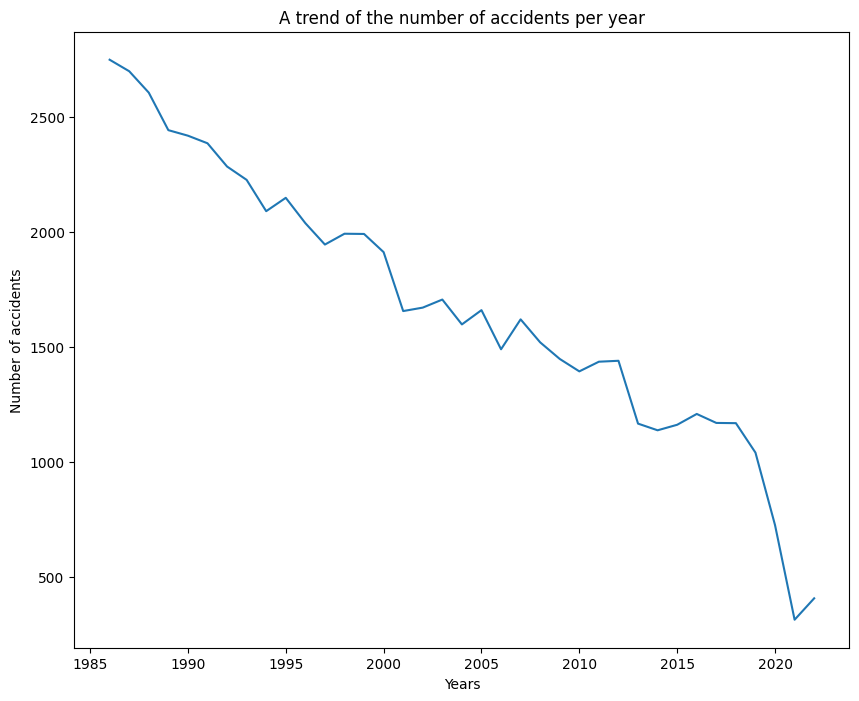

In [127]:
#plot a line graph that shows the trend of accidents overtime
#I included the years from 1982 moving forward as before there were not many flights
x = years
y = number_of_accidents_per_year
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(x,y)
ax.set_xlabel('Years')
ax.set_ylabel('Number of accidents')
ax.set_title('A trend of the number of accidents per year')
plt.show();

Recommendation 1: we shoud invest in the aviation industry since the number of accidents have reduced with a high percentage in the recent years

## 2. Determing which sector a company can invest in?

In [128]:
sector = df_cleaned['Purpose Of Flight'].value_counts()

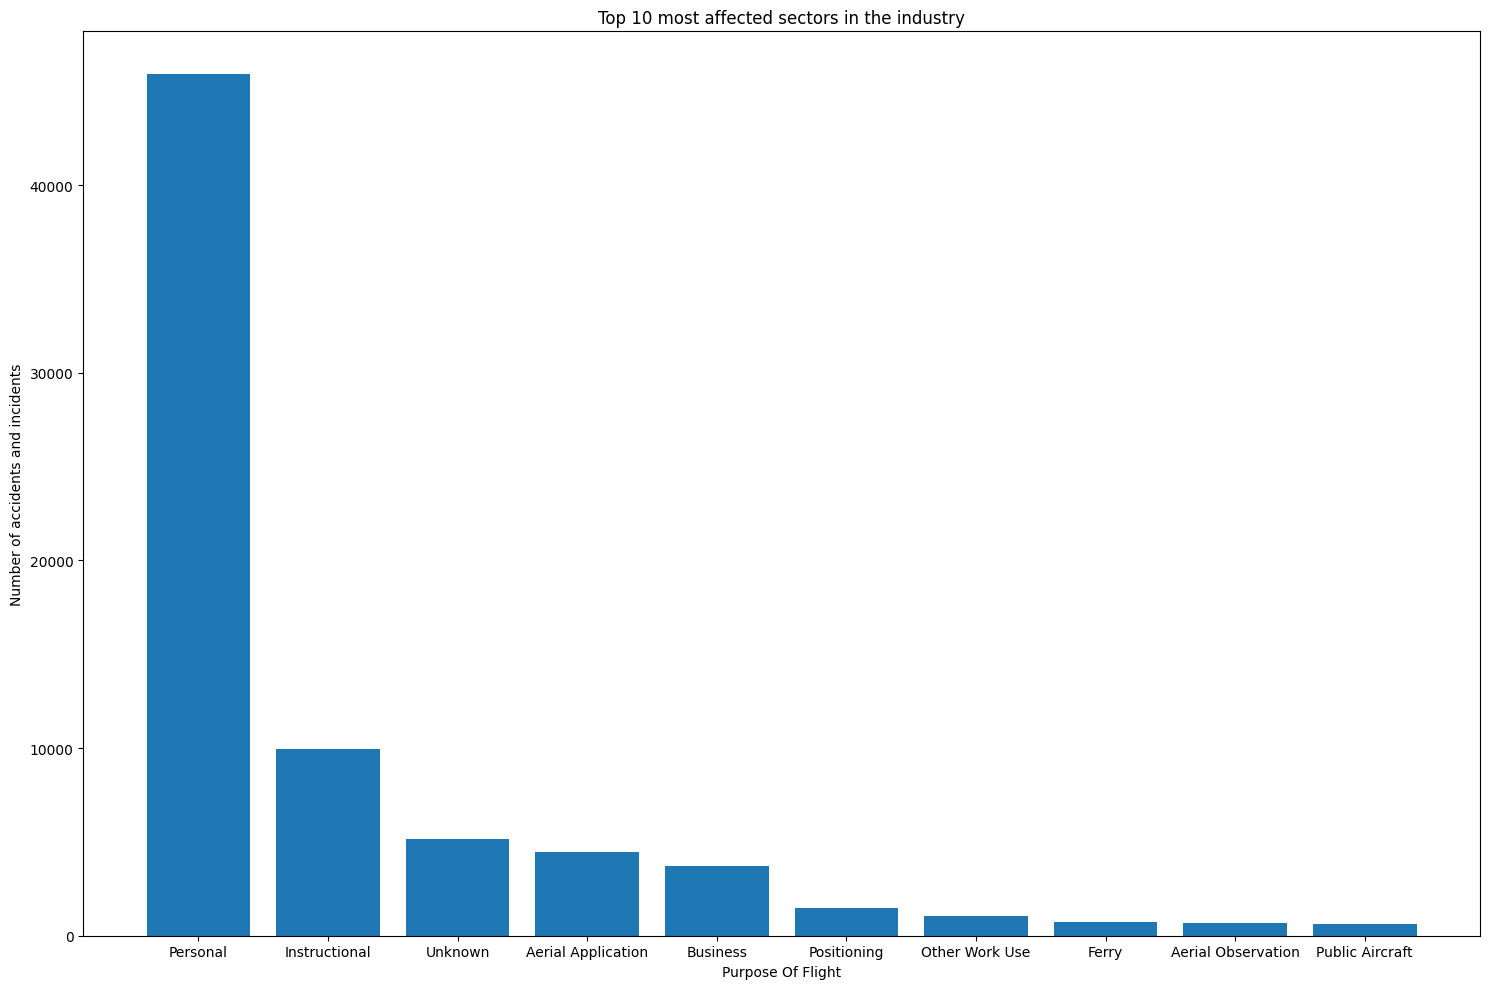

In [129]:
fig,ax = plt.subplots(figsize = (15,10))
fig.set_tight_layout(True)
ax.bar(sector.index.tolist()[:10],sector.tolist()[:10])
ax.set_xlabel('Purpose Of Flight')
ax.set_ylabel('Number of accidents and incidents')
ax.set_title('Top 10 most affected sectors in the industry')
plt.show();

Recommendation 2: The personal flights are the most affected sector in the aviation industry therefore we don't recomment it but rather we can invest in business flights they are not affected more than the personal flights

## 3.Determing the aircraft Make that causes most accidents
### The top 10 makes with most accidents


In [130]:
counts_of_accidents_and_incidents = df_cleaned['Make'].value_counts()

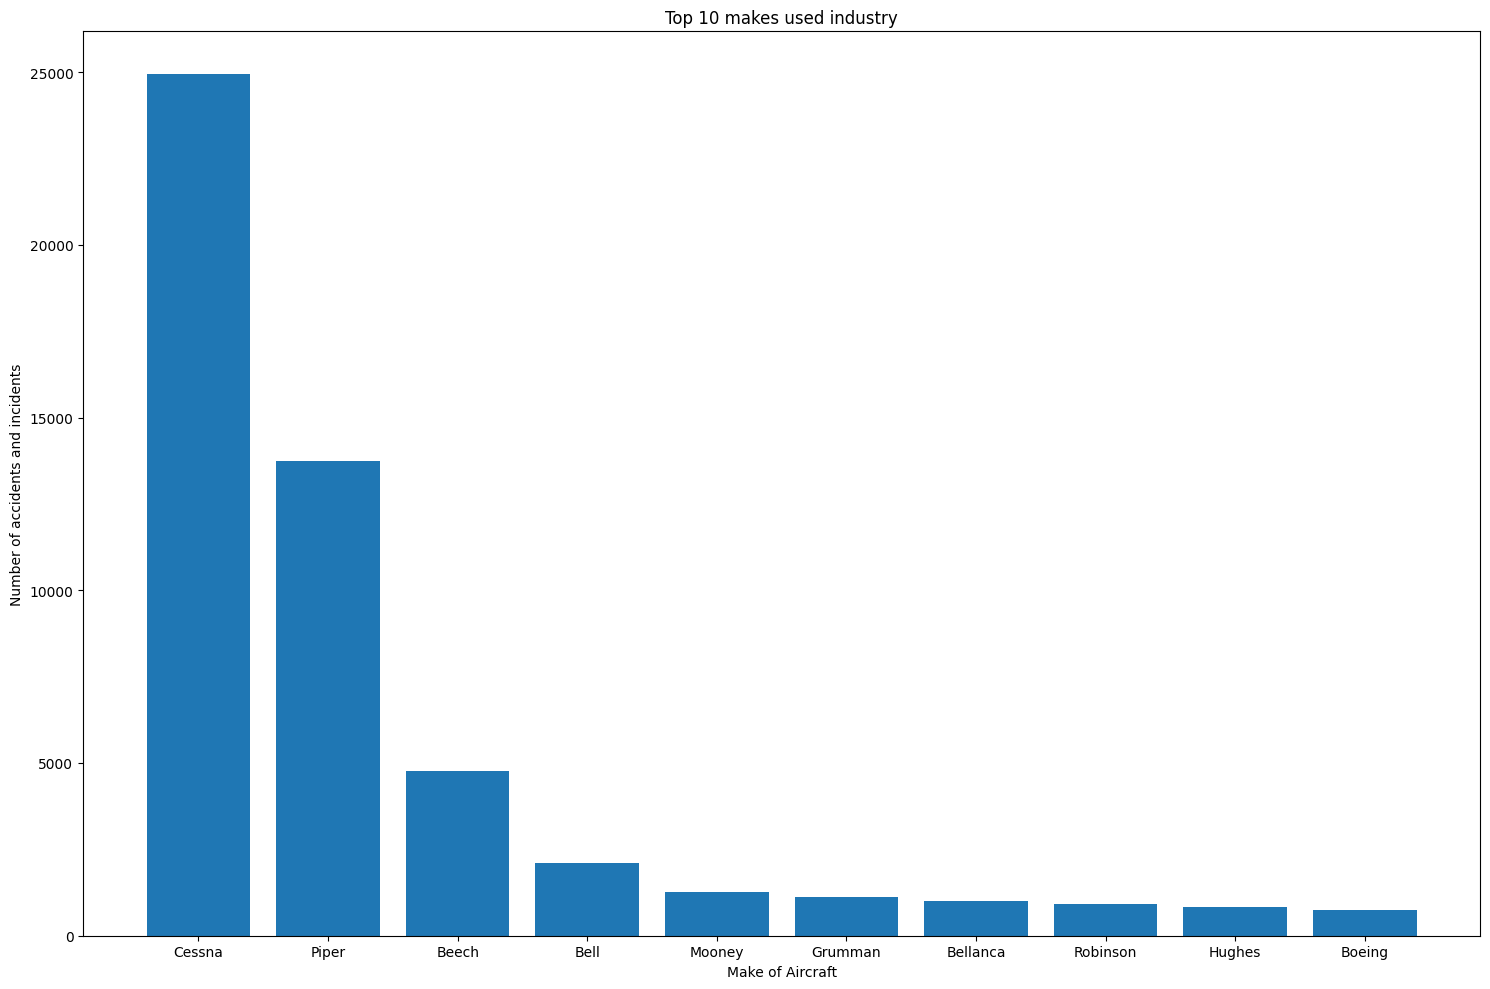

In [131]:
fig,ax = plt.subplots(figsize = (15,10))
fig.set_tight_layout(True)
ax.bar(counts_of_accidents_and_incidents.index.tolist()[:10],counts_of_accidents_and_incidents.tolist()[:10])
ax.set_xlabel('Make of Aircraft')
ax.set_ylabel('Number of accidents and incidents')
ax.set_title('Top 10 makes used industry')
plt.show();

Recommendation 3: Cessa make seems to have caused more accidents thus we can recommend makes like Hughes or Boeing to be used since they cause few accidents

## 4.Determing which type of aircraft should the company invest in?

There are two types of builds that the company can invest in. It is important to know their risk.





In [132]:
# Exclude 'Unavailable' entries
df_cleaned = df_cleaned.loc[~(df_cleaned['Injury Severity'] == 'Unavailable')]

# Strip 'Fatal', replace 'Non-' and 'Inciden' with '0'
df_cleaned['Injury Severity'] = df_cleaned['Injury Severity'].str.strip('Fatal')
df_cleaned['Injury Severity'] = df_cleaned['Injury Severity'].str.replace('Non-', '0')
df_cleaned['Injury Severity'] = df_cleaned['Injury Severity'].str.replace('Inciden', '0')

# Map non-numeric categories to numbers
severity_mapping = {
    'Minor': 1,
    'Moderate': 2,
    'Serious': 3
}

df_cleaned['Injury Severity'] = df_cleaned['Injury Severity'].replace(severity_mapping)

# Strip parentheses
df_cleaned['Injury Severity'] = df_cleaned['Injury Severity'].str.strip('(').str.strip(')')

# Replace empty strings with NaN
df_cleaned['Injury Severity'].replace('', np.nan, inplace=True)

# Drop rows with NaN values in 'Injury Severity'
df_cleaned.dropna(subset=['Injury Severity'], inplace=True)

# Convert to integer
df_cleaned['Injury Severity'] = df_cleaned['Injury Severity'].astype(int)

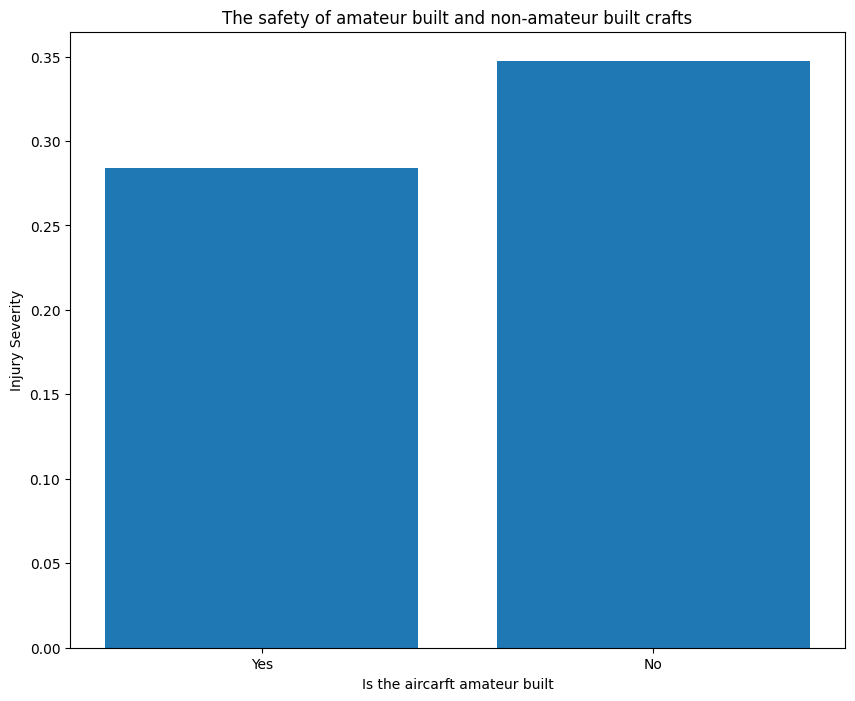

In [133]:
df_cleaned['Injury Severity'] = df_cleaned['Injury Severity'].astype(int)
safety = df_cleaned.groupby(['Amateur Built'])['Injury Severity'].mean().sort_values()
x = safety.index.tolist()
y = safety.tolist()
fig,ax = plt.subplots(figsize = (10,8))
ax.bar(x,y)
ax.set_ylabel('Injury Severity')
ax.set_xlabel('Is the aircarft amateur built')
ax.set_title('The safety of amateur built and non-amateur built crafts')
plt.show();

## 5.Determing the relationship between weather conditions and number of accidents


### a)Determing cause of all accidents in relation to weather condition

In [134]:
df_cleaned['Weather Condition'] = df_cleaned['Weather Condition'].replace('Unk', 'UNK')

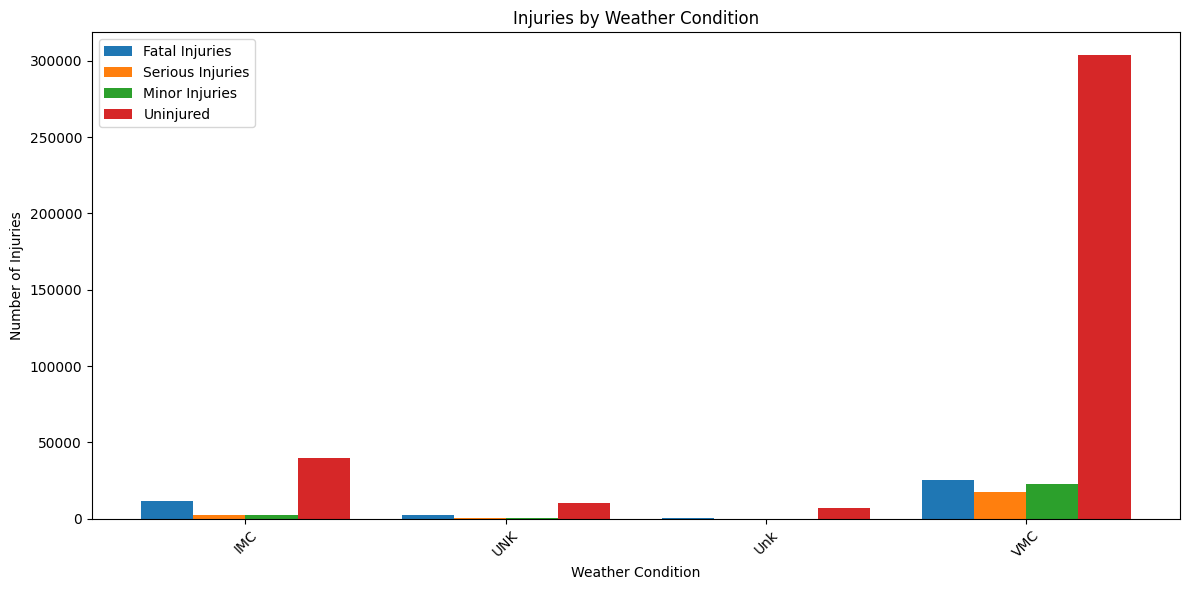

In [135]:
# Grouping data by 'Weather Condition' and summing up injury counts
injuries_by_weather = df.groupby('Weather Condition')[['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']].sum()

# Defining the number of bars per weather condition and their positions
bar_width = 0.2
index = np.arange(len(injuries_by_weather))

# Creating subplots for each injury type side by side
plt.figure(figsize=(12, 6))
# Plot each injury type next to each other
plt.bar(index, injuries_by_weather['Total Fatal Injuries'], bar_width, label='Fatal Injuries')
plt.bar(index + bar_width, injuries_by_weather['Total Serious Injuries'], bar_width, label='Serious Injuries')
plt.bar(index + 2 * bar_width, injuries_by_weather['Total Minor Injuries'], bar_width, label='Minor Injuries')
plt.bar(index + 3 * bar_width, injuries_by_weather['Total Uninjured'], bar_width, label='Uninjured')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Injuries')
plt.title('Injuries by Weather Condition')
plt.xticks(index + bar_width * 1.5, injuries_by_weather.index, rotation=45)

# Adding a legend
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

We can conclude that accidents are happening irregardless of the weather condition since the number of uninjured people is more is each category of weather conditon

### b)Comparing cause of fatal accidents in respect to weather conditions

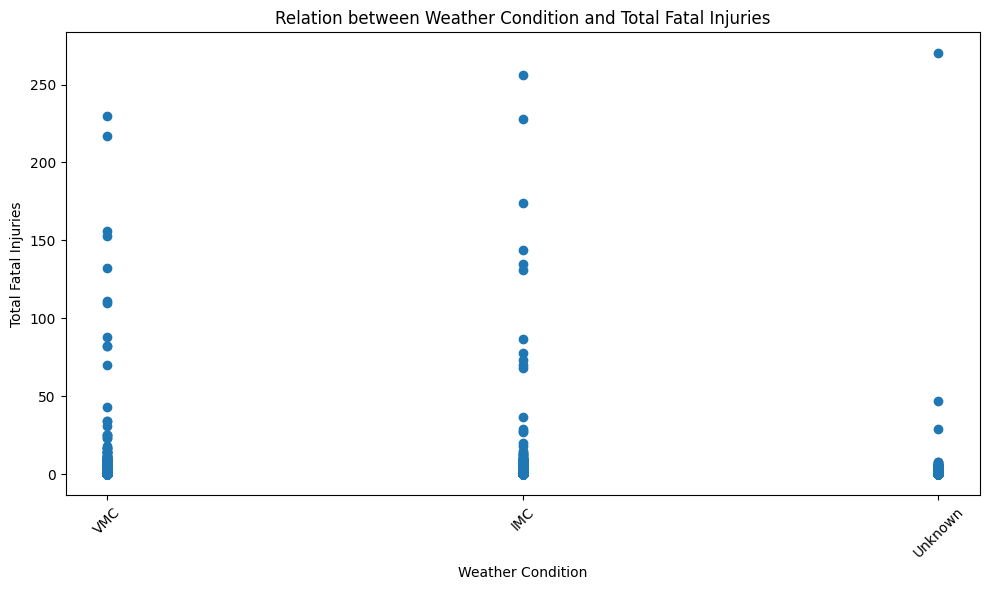

In [136]:
import matplotlib.pyplot as plt

# Assuming 'df_cleaned' is your DataFrame with 'Weather Condition' and 'Total Fatal Injuries'
weather_condition = df_cleaned['Weather Condition']  # Column for weather conditions
accidents = df_cleaned['Total Fatal Injuries']       # Column for the number of accidents (total fatal injuries)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar plot
ax.scatter(weather_condition, accidents)  # Correctly using the variable names

# Set labels and title
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Total Fatal Injuries')
ax.set_title('Relation between Weather Condition and Total Fatal Injuries')

# Rotate x-axis labels if weather conditions are categorical and long
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


### 6.Determing the risks that emerge due to different engine type

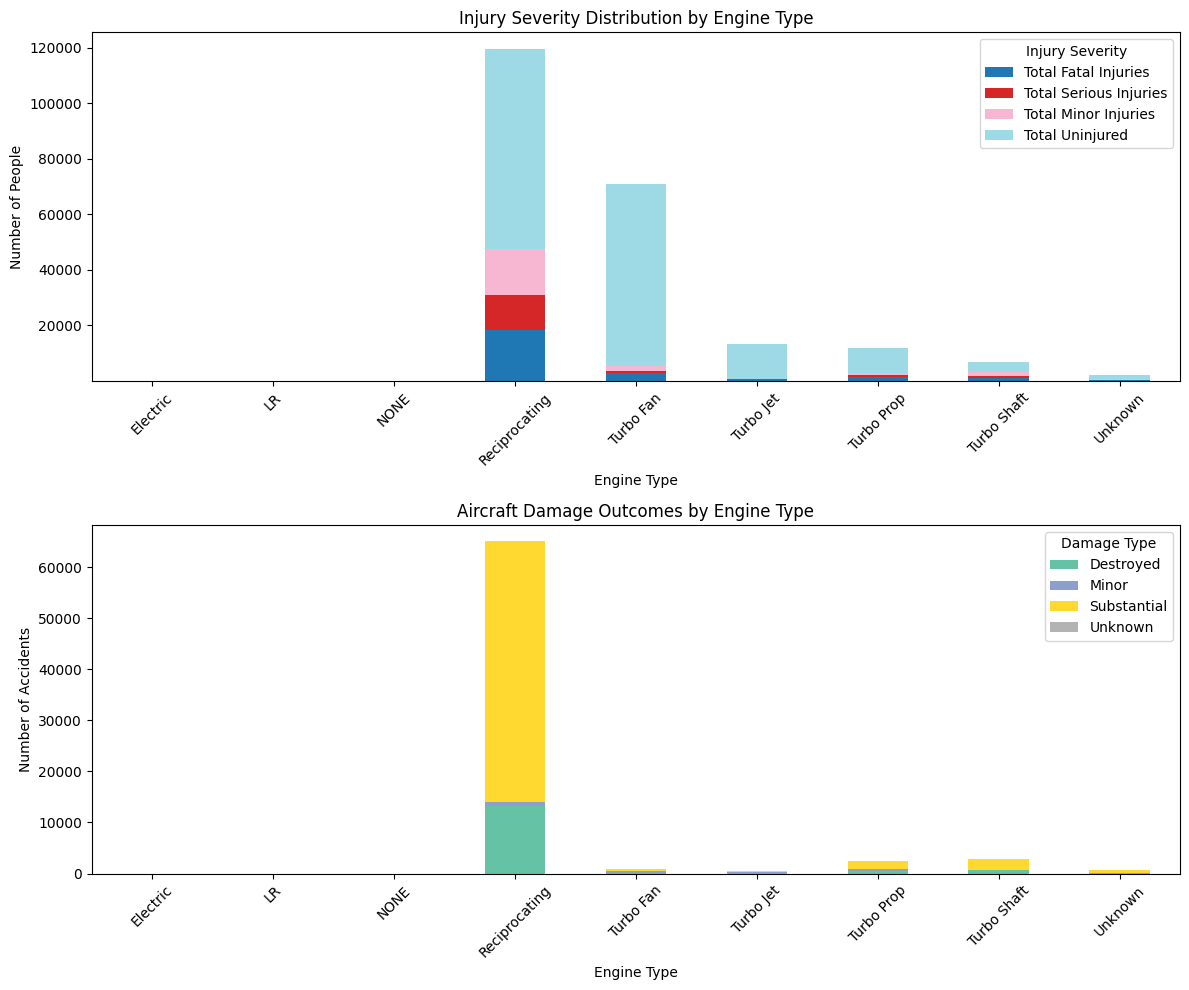

In [137]:
# Grouping data by 'Engine Type' and aggregating injury severities and accident outcomes
engine_type_analysis = df_cleaned.groupby('Engine Type')[['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']].sum()
# Adding counts of damage types per engine type
damage_by_engine_type = df_cleaned.groupby('Engine Type')['Aircraft Damage'].value_counts().unstack().fillna(0)
# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
# Plotting the injury severity distribution as a stacked bar plot
engine_type_analysis.plot(kind='bar', stacked=True, ax=ax1, colormap='tab20')
# Adding labels and title for the first subplot
ax1.set_title('Injury Severity Distribution by Engine Type')
ax1.set_xlabel('Engine Type')
ax1.set_ylabel('Number of People')
ax1.legend(title='Injury Severity')
ax1.set_xticklabels(engine_type_analysis.index, rotation=45)
# Plotting the aircraft damage outcomes as a stacked bar plot
damage_by_engine_type.plot(kind='bar', stacked=True, ax=ax2, colormap='Set2')

# Adding labels and title for the second subplot
ax2.set_title('Aircraft Damage Outcomes by Engine Type')
ax2.set_xlabel('Engine Type')
ax2.set_ylabel('Number of Accidents')
ax2.legend(title='Damage Type')
ax2.set_xticklabels(damage_by_engine_type.index, rotation=45)
# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()

### 7.What is survivability Rates by Aircraft Make and Model?¶
Purpose: To identify which makes and models have higher accident survivability rates.

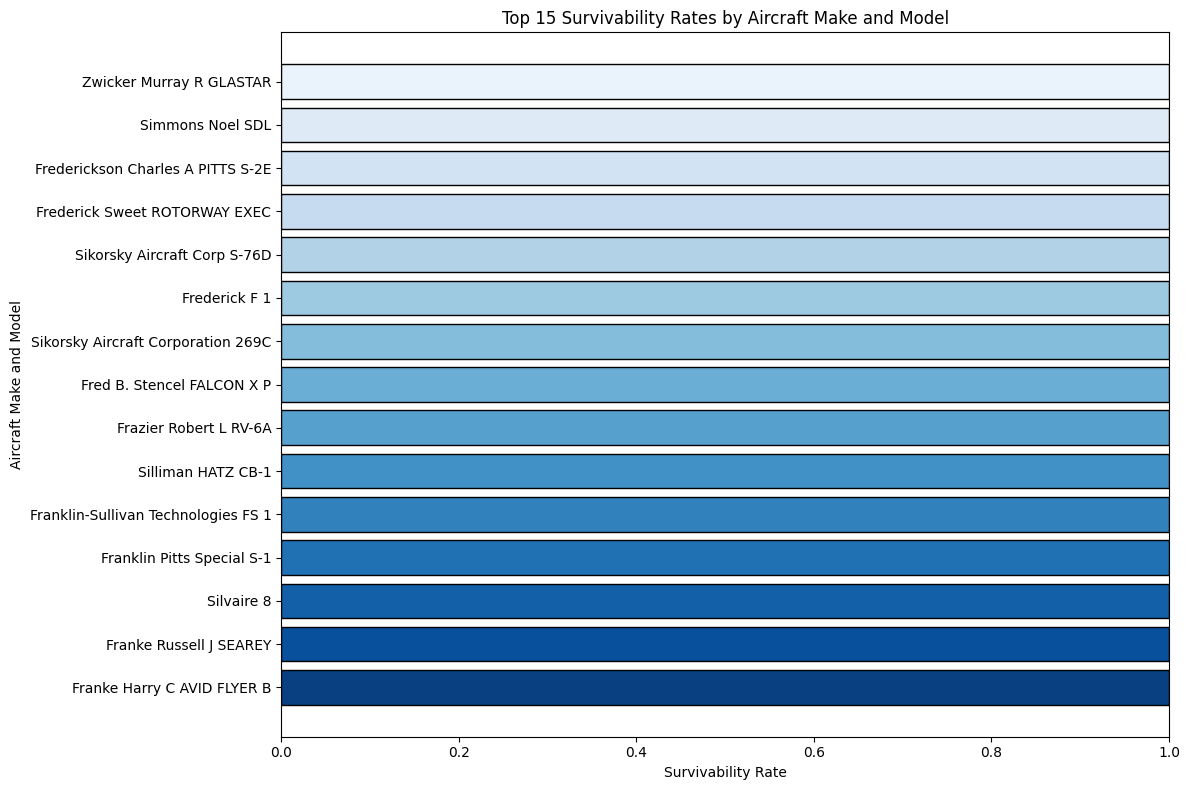

In [138]:
# Step 1: Calculate total passengers involved in each accident
df_cleaned['Total Passengers'] = df_cleaned[['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']].sum(axis=1)

# Step 2: Calculate survivability rate as Total Uninjured / Total Passengers
df_cleaned['Survivability Rate'] = df_cleaned['Total Uninjured'] / df_cleaned['Total Passengers'].replace(0, pd.NA)
# Step 3: Group by 'Make' and 'Model' to get average survivability rates for each combination
survivability_by_make_model = df_cleaned.groupby(['Make', 'Model'])['Survivability Rate'].mean().reset_index()

# Step 4: Sort by survivability rate in descending order to find the best-performing makes and models
survivability_by_make_model_sorted = survivability_by_make_model.sort_values(by='Survivability Rate', ascending=False)
# Step 5: Select the top 15 makes and models with the highest survivability rates
top_15_survivability = survivability_by_make_model_sorted.head(15)

# Step 6: Create subplots for visualization
fig, ax = plt.subplots(figsize=(12, 8))
# Step 7: Create a color gradient based on survivability rates
colors = sns.color_palette("Blues", n_colors=len(top_15_survivability))

# Step 8: Bar plot of survivability rates by top 15 aircraft make and model
bars = ax.barh(top_15_survivability['Make'] + ' ' + top_15_survivability['Model'], 
                top_15_survivability['Survivability Rate'], 
                color=colors)
# Optional: Add edge color
for bar in bars:
    bar.set_edgecolor('black')
# Add labels and title
ax.set_xlabel('Survivability Rate')
ax.set_ylabel('Aircraft Make and Model')
ax.set_title('Top 15 Survivability Rates by Aircraft Make and Model')
ax.set_xlim(0, 1)  # Survivability rates range between 0 and 1
ax.invert_yaxis()  # Invert y-axis to have highest survivability on top
# Step 9: Display the plot
plt.tight_layout()
plt.show()